In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import math
import pickle

In [2]:
data = pd.read_csv("TaxiTrip2021Subset.csv")
data['Tip Class'] = (data.Tips > 0).astype(int)
dataR = data[data['Tip Class'] > 0]
train = data.sample(frac=0.8)
test = data.drop(train.index).sample(frac=1.0)
trainR = dataR.sample(frac=0.8)
testR = dataR.drop(trainR.index).sample(frac=1.0)

In [3]:
trainX = train[['Trip Seconds', 'Trip Miles', 'Fare']]
trainY = train['Tip Class']
trainRX = trainR[['Trip Seconds', 'Trip Miles', 'Fare']]
trainRY = trainR['Tips']
testX = test[['Trip Seconds', 'Trip Miles', 'Fare']]
testY = test['Tips']

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(max_depth=3, random_state=0)
rfr = RandomForestRegressor(max_depth=10, random_state=0)
rfc.fit(trainX,trainY)
rfr.fit(trainRX,trainRY)

RandomForestRegressor(max_depth=10, random_state=0)

In [5]:
rfc_predY = rfc.predict(testX)
rfr_predY = rfr.predict(testX)*(rfc_predY)
rmse = math.sqrt(mean_squared_error(testY,rfr_predY))

testYp = testY[testY > 0]
predYp = rfr_predY[testY > 0]
rmsep = math.sqrt(mean_squared_error(testYp,predYp))

predYp2 = rfr_predY[rfr_predY > 0]
testYp2 = testY[rfr_predY > 0]
rmsep2 = math.sqrt(mean_squared_error(testYp2,predYp2))

testRY = test['Tip Class']
acc = accuracy_score(testRY, rfc_predY)
#print(rfc_predY)
#print(predYp2)
print("RMSE: " + "{:.2f}".format(rmse) + "\nTest RMSE: " + "{:.2f}".format(rmsep) + "\nPrediction RMSE: " + "{:.2f}".format(rmsep2) + "\nClassifier Accuracy: " + "{:.2f}".format(acc))

RMSE: 3.54
Test RMSE: 6.33
Prediction RMSE: 6.27
Classifier Accuracy: 0.73


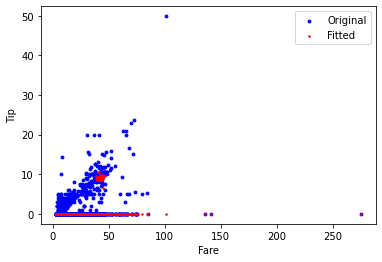

In [6]:
plt.scatter(testX['Fare'], testY, s=8, color='blue', label="Original")
plt.scatter(testX['Fare'], rfr_predY, s=2, color="red", label="Fitted")
plt.legend()
plt.xlabel('Fare')
plt.ylabel('Tip')
plt.show()

In [7]:
pickle.dump(rfr, open('RFR_Model2.sav', 'wb'))